# Task 1 & 2: Mining Industry Analysis & Ecological Impacts

## Deep Earth Mining Strategic Investment Plan

This notebook covers:
- **Task 1**: Understanding the mining industry operations and cost structure
- **Task 2**: Ecological impacts of deep-earth mining and mitigation strategies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load data
xlsx = pd.ExcelFile('Deep Earth Mining Data.xlsx')
df_composition = pd.read_excel(xlsx, sheet_name='Composition')
df_cost = pd.read_excel(xlsx, sheet_name='Cost')
df_market = pd.read_excel(xlsx, sheet_name='Market')
df_refining = pd.read_excel(xlsx, sheet_name='Refining Costs')

print("Data loaded successfully!")
print(f"Composition: {df_composition.shape}")
print(f"Cost: {df_cost.shape}")
print(f"Market: {df_market.shape}")
print(f"Refining: {df_refining.shape}")


Data loaded successfully!
Composition: (66, 35)
Cost: (65, 9)
Market: (90, 6)
Refining: (30, 2)


---
# Task 1: Understanding the Mining Industry

## 1.1 Major Operations of a Mining Company

A mining company's operations follow a sequential pipeline from discovery to market:

### Operational Pipeline

```
┌─────────────┐    ┌─────────────┐    ┌─────────────┐    ┌───────────────┐    ┌──────────┐    ┌───────────┐
│  Licensing  │ → │ Exploration │ → │ Extraction  │ → │ Concentration │ → │ Refining │ → │ Logistics │
│  & Permits  │    │ & Surveying │    │   (Mining)  │    │ (Benefication)│    │          │    │ & Sales   │
└─────────────┘    └─────────────┘    └─────────────┘    └───────────────┘    └──────────┘    └───────────┘
```

| Stage | Description | Key Activities |
|-------|-------------|----------------|
| **Licensing** | Obtaining legal rights to explore/mine | Government permits, environmental clearances, land acquisition |
| **Exploration** | Identifying mineral deposits | Geological surveys, core drilling, resource estimation |
| **Extraction** | Removing ore from the earth | Open-pit/underground mining, drilling, blasting |
| **Concentration** | Separating valuable minerals from waste | Crushing, grinding, flotation, magnetic separation |
| **Refining** | Purifying minerals to market-grade | Smelting, electrolysis, chemical processing |
| **Logistics** | Transporting products to market | Rail/shipping infrastructure, warehousing, sales |

### Deep-Earth Mining Specific Considerations
- Depths up to 20 km require advanced drilling technology
- Higher pressure and temperature management
- Enhanced ventilation and cooling systems
- Specialized equipment for extreme conditions


## 1.2 Major Expenses in Mining Operations

Mining companies face significant costs across multiple categories. Let's analyze the cost structure from our data:


In [2]:
# Clean and prepare cost data
df_cost_clean = df_cost.dropna(subset=['Depth_km']).copy()
df_cost_clean.columns = df_cost_clean.columns.str.strip()

# Display cost structure
print("=== Cost Data Structure ===")
cost_col = "Total Extraction Cost ('000 USD/ton)"
print(df_cost_clean[['Location', 'Depth_km', cost_col,
                      'Maintenance Cost Index', 'Manpower Cost (USD/ton)']].head(10))

# Extract Location A data for analysis
loc_a = df_cost_clean[df_cost_clean['Location'] == 'Location A'].copy()
print(f"\nLocation A depth range: {loc_a['Depth_km'].min()} - {loc_a['Depth_km'].max()} km")
cost_min = loc_a[cost_col].min()
cost_max = loc_a[cost_col].max()
print(f"Cost range: ${cost_min:.0f}K - ${cost_max:.0f}K per ton")


=== Cost Data Structure ===
     Location  Depth_km  Total Extraction Cost ('000 USD/ton)  \
0  Location A       0.0                            308.502678   
1  Location A       1.0                            534.771491   
2  Location A       2.0                            745.403862   
3  Location A       3.0                           1114.272221   
4  Location A       4.0                           1399.190226   
5  Location A       5.0                           1566.570079   
6  Location A       6.0                           1759.771758   
7  Location A       7.0                           2216.605294   
8  Location A       8.0                           2319.035213   
9  Location A       9.0                           2419.047231   

   Maintenance Cost Index  Manpower Cost (USD/ton)  
0                    1.00                    42.64  
1                    1.03                    43.28  
2                    1.08                    51.63  
3                    1.14                   

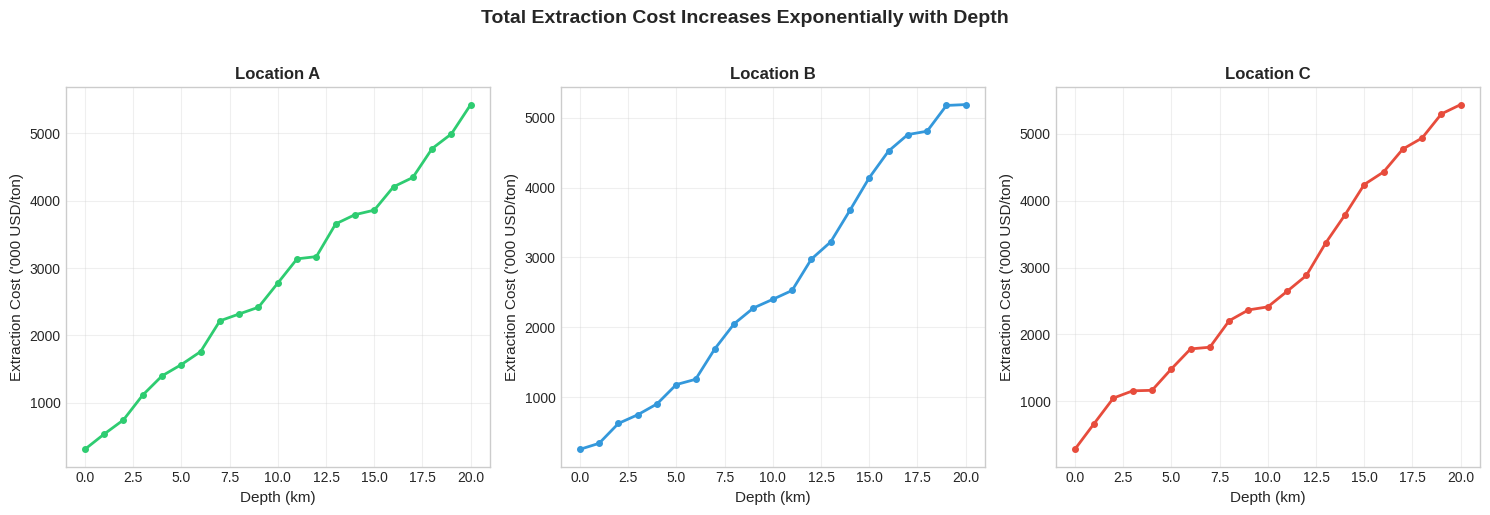


📊 Key Insight: Extraction costs rise dramatically with depth, from ~$300K/ton at surface to $2.4M+/ton at 20km


In [3]:
# Visualization: Extraction Cost vs Depth by Location
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cost_col = "Total Extraction Cost ('000 USD/ton)"
locations = ['Location A', 'Location B', 'Location C']
colors = ['#2ecc71', '#3498db', '#e74c3c']

for ax, loc, color in zip(axes, locations, colors):
    loc_data = df_cost_clean[df_cost_clean['Location'] == loc]
    ax.plot(loc_data['Depth_km'], loc_data[cost_col],
            marker='o', linewidth=2, color=color, markersize=4)
    ax.set_xlabel('Depth (km)', fontsize=11)
    ax.set_ylabel("Extraction Cost ('000 USD/ton)", fontsize=11)
    ax.set_title(loc, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.suptitle('Total Extraction Cost Increases Exponentially with Depth',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 Key Insight: Extraction costs rise dramatically with depth, from ~$300K/ton at surface to $2.4M+/ton at 20km")


## 1.3 Major Cost Drivers in Mining Operations

Based on industry analysis and our data, here are the primary cost categories:

| Cost Category | Description | % of Total* | Deep-Earth Impact |
|---------------|-------------|-------------|-------------------|
| **Operational Costs** | Energy, equipment wear, consumables | 35-45% | Increases exponentially with depth |
| **CAPEX (Capital)** | Infrastructure, equipment, facilities | 20-30% | Higher initial investment for deep drilling |
| **Labor** | Skilled workers, safety personnel | 15-25% | Premium pay for hazardous conditions |
| **Refining** | Processing ore to market-grade minerals | 10-15% | Constant per mineral type |
| **Logistics** | Transportation, warehousing | 5-10% | Increases with number of minerals |
| **Environmental** | Compliance, monitoring, remediation | 5-10% | Higher for deep-earth operations |

*Approximate ranges based on industry reports (Rio Tinto, BHP Annual Reports 2023-2024)


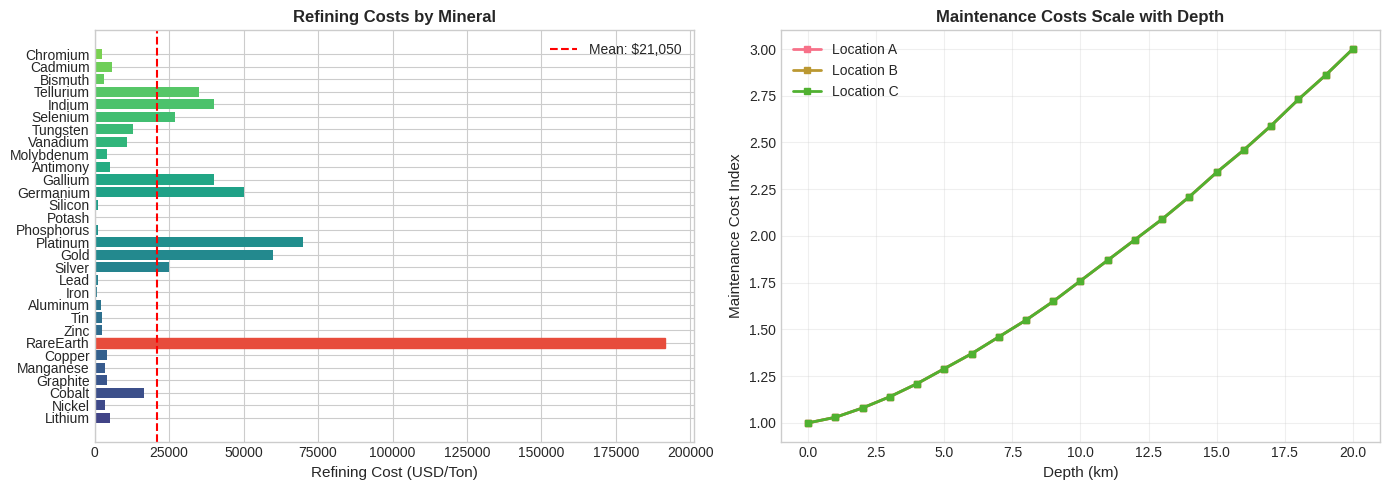


💎 Rare Earth refining is most expensive at $191,508/ton
📈 Maintenance costs increase by ~200% at maximum depth


In [4]:
# Analyze refining costs by mineral
df_refining_clean = df_refining.rename(columns={'Unnamed: 0': 'Mineral'}).dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Refining costs bar chart
ax1 = axes[0]
minerals = df_refining_clean['Mineral'].values
refining_costs = df_refining_clean['Refining Cost (USD/Ton)'].values
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(minerals)))
bars = ax1.barh(minerals, refining_costs, color=colors)
ax1.set_xlabel('Refining Cost (USD/Ton)', fontsize=11)
ax1.set_title('Refining Costs by Mineral', fontsize=12, fontweight='bold')
ax1.axvline(x=np.mean(refining_costs), color='red', linestyle='--', label=f'Mean: ${np.mean(refining_costs):,.0f}')
ax1.legend()

# Highlight RareEarth as outlier
for bar, mineral in zip(bars, minerals):
    if mineral == 'RareEarth':
        bar.set_color('#e74c3c')

# Maintenance cost index by depth
ax2 = axes[1]
for loc, color in zip(locations, colors[:3]):
    loc_data = df_cost_clean[df_cost_clean['Location'] == loc]
    ax2.plot(loc_data['Depth_km'], loc_data['Maintenance Cost Index'],
             marker='s', linewidth=2, label=loc, markersize=4)
ax2.set_xlabel('Depth (km)', fontsize=11)
ax2.set_ylabel('Maintenance Cost Index', fontsize=11)
ax2.set_title('Maintenance Costs Scale with Depth', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💎 Rare Earth refining is most expensive at ${df_refining_clean[df_refining_clean['Mineral']=='RareEarth']['Refining Cost (USD/Ton)'].values[0]:,}/ton")
print(f"📈 Maintenance costs increase by ~{(df_cost_clean['Maintenance Cost Index'].max() - 1)*100:.0f}% at maximum depth")


---
# Task 2: Ecological Impacts of Deep-Earth Mining & Mitigation Strategies

## 2.1 Major Ecological Impacts

Deep-earth mining (0-20 km) poses unique environmental challenges beyond traditional mining:


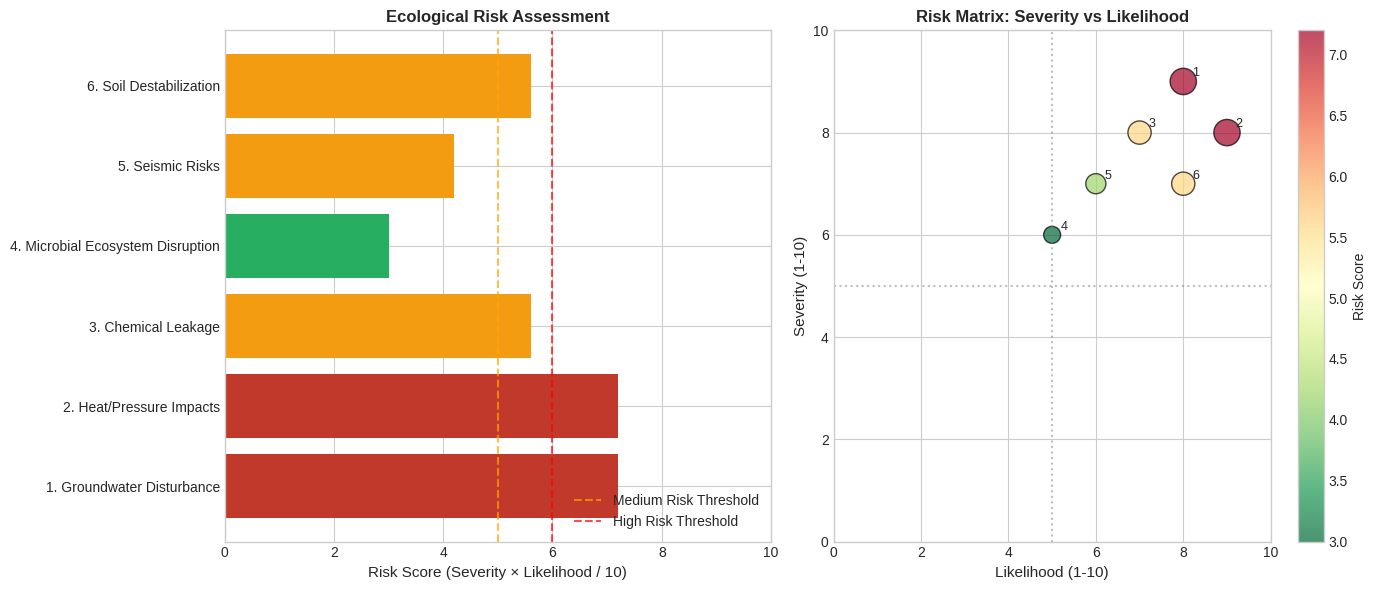


⚠️ Highest Risk: Groundwater Disturbance and Heat/Pressure Impacts require immediate mitigation strategies


In [5]:
# Define ecological impacts and mitigation strategies
ecological_data = {
    'Impact': [
        '1. Groundwater Disturbance',
        '2. Heat/Pressure Impacts',
        '3. Chemical Leakage',
        '4. Microbial Ecosystem Disruption',
        '5. Seismic Risks',
        '6. Soil Destabilization'
    ],
    'Description': [
        'Deep drilling intersects aquifers, altering water tables and contaminating drinking water sources',
        'Extreme temperatures (400°C+) and pressure at depth affect surrounding rock stability and release gases',
        'Mining fluids and extracted minerals can leak toxic chemicals into soil and groundwater',
        'Deep subsurface hosts unique microbial ecosystems that may be irreversibly damaged',
        'Deep excavation can trigger micro-earthquakes and fault line activation',
        'Removal of deep material causes surface subsidence and structural instability'
    ],
    'Severity': [9, 8, 8, 6, 7, 7],  # Scale 1-10
    'Likelihood': [8, 9, 7, 5, 6, 8]  # Scale 1-10
}

df_eco = pd.DataFrame(ecological_data)
df_eco['Risk_Score'] = df_eco['Severity'] * df_eco['Likelihood'] / 10

# Create risk matrix visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Risk scores bar chart
ax1 = axes[0]
colors_risk = ['#c0392b' if x > 6 else '#f39c12' if x > 4 else '#27ae60' for x in df_eco['Risk_Score']]
bars = ax1.barh(df_eco['Impact'], df_eco['Risk_Score'], color=colors_risk)
ax1.set_xlabel('Risk Score (Severity × Likelihood / 10)', fontsize=11)
ax1.set_title('Ecological Risk Assessment', fontsize=12, fontweight='bold')
ax1.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='Medium Risk Threshold')
ax1.axvline(x=6, color='red', linestyle='--', alpha=0.7, label='High Risk Threshold')
ax1.legend(loc='lower right')
ax1.set_xlim(0, 10)

# Scatter plot: Severity vs Likelihood
ax2 = axes[1]
scatter = ax2.scatter(df_eco['Likelihood'], df_eco['Severity'],
                      s=df_eco['Risk_Score']*50, c=df_eco['Risk_Score'],
                      cmap='RdYlGn_r', alpha=0.7, edgecolors='black')
for i, txt in enumerate(df_eco['Impact'].str.split('.').str[0]):
    ax2.annotate(txt, (df_eco['Likelihood'].iloc[i]+0.2, df_eco['Severity'].iloc[i]+0.1), fontsize=9)
ax2.set_xlabel('Likelihood (1-10)', fontsize=11)
ax2.set_ylabel('Severity (1-10)', fontsize=11)
ax2.set_title('Risk Matrix: Severity vs Likelihood', fontsize=12, fontweight='bold')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axhline(y=5, color='gray', linestyle=':', alpha=0.5)
ax2.axvline(x=5, color='gray', linestyle=':', alpha=0.5)
plt.colorbar(scatter, ax=ax2, label='Risk Score')

plt.tight_layout()
plt.show()

print("\n⚠️ Highest Risk: Groundwater Disturbance and Heat/Pressure Impacts require immediate mitigation strategies")


## 2.2 Proposed Mitigation Strategies

### Cross-Functional Solutions (Strategy + Business + R&D Teams)

| Ecological Impact | Proposed Solution | Team Involvement |
|-------------------|-------------------|------------------|
| **Groundwater Disturbance** | Deploy advanced **closed-loop drilling systems** with real-time aquifer monitoring using IoT sensors. Install multi-layered impermeable barriers and implement AI-driven water table prediction models. | R&D (sensor tech), Strategy (investment), Business (compliance) |
| **Heat/Pressure Impacts** | Utilize **geothermal heat recovery systems** to convert excess heat into energy. Deploy pressure-equilibrating chambers and phase-change cooling materials developed for space applications. | R&D (thermal engineering), Business (energy revenue stream) |
| **Chemical Leakage** | Implement **bioremediation protocols** using extremophile bacteria. Use biodegradable drilling fluids and triple-containment storage for extracted materials with real-time leak detection. | R&D (biochemistry), Strategy (risk mitigation), Business (insurance) |
| **Seismic Risks** | Install **distributed seismic sensor networks** with machine learning early warning systems. Conduct micro-seismic mapping before operations and implement gradual extraction protocols. | R&D (seismology AI), Strategy (site selection) |

### Key Innovation: Our Advanced Drilling Technology
Our company's proprietary deep-drilling technology enables extraction up to 20km with **minimal ecological footprint** through:
- Precision directional drilling reducing surface disturbance
- Automated pressure management systems
- Integrated environmental monitoring throughout the drill column


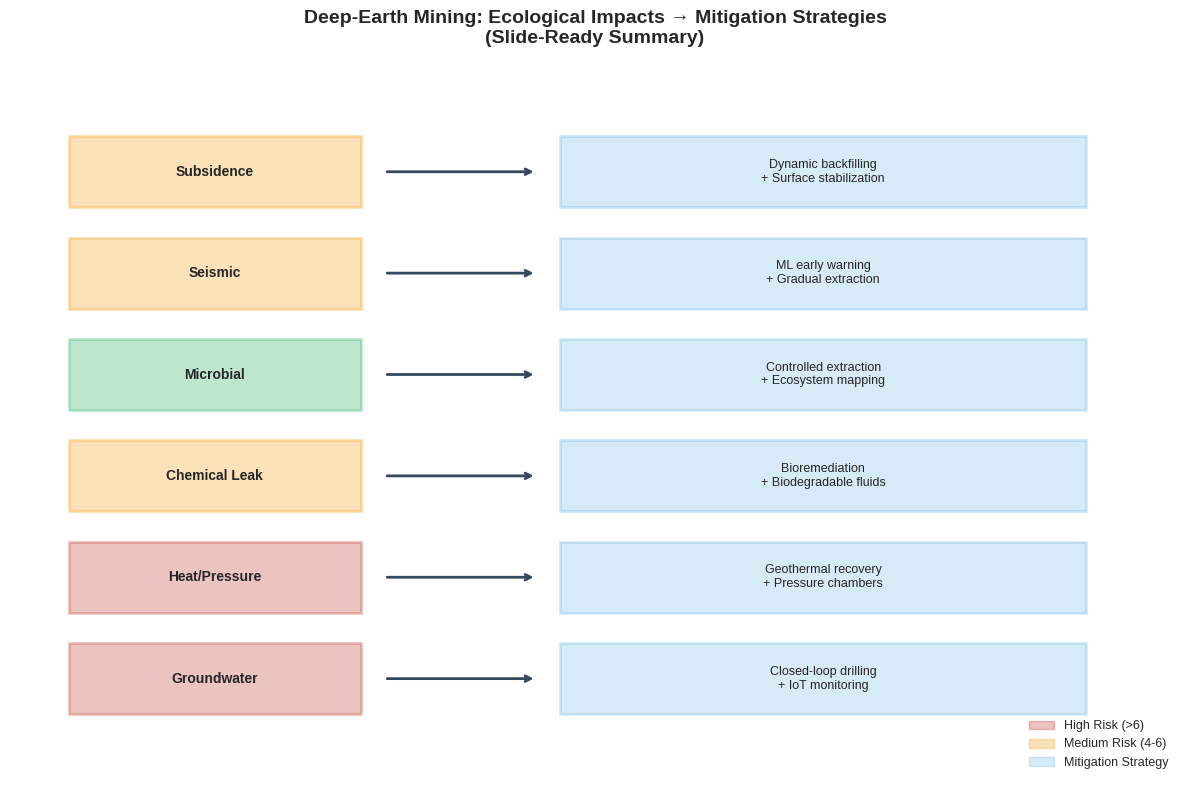


✅ This visualization is slide-ready for Task 2 presentation


In [6]:
# Summary visualization for slides - Ecological Impacts & Solutions
fig, ax = plt.subplots(figsize=(12, 8))

# Create a visual summary
impacts_short = ['Groundwater', 'Heat/Pressure', 'Chemical Leak', 'Microbial', 'Seismic', 'Subsidence']
solutions_short = [
    'Closed-loop drilling\n+ IoT monitoring',
    'Geothermal recovery\n+ Pressure chambers',
    'Bioremediation\n+ Biodegradable fluids',
    'Controlled extraction\n+ Ecosystem mapping',
    'ML early warning\n+ Gradual extraction',
    'Dynamic backfilling\n+ Surface stabilization'
]

y_positions = np.arange(len(impacts_short))
risk_scores = df_eco['Risk_Score'].values

# Draw connecting boxes
for i, (impact, solution, risk) in enumerate(zip(impacts_short, solutions_short, risk_scores)):
    # Impact box (left)
    color = '#c0392b' if risk > 6 else '#f39c12' if risk > 4 else '#27ae60'
    ax.add_patch(plt.Rectangle((0.05, i-0.35), 0.25, 0.7, facecolor=color, alpha=0.3, edgecolor=color, linewidth=2))
    ax.text(0.175, i, impact, ha='center', va='center', fontsize=10, fontweight='bold')

    # Arrow
    ax.annotate('', xy=(0.45, i), xytext=(0.32, i),
                arrowprops=dict(arrowstyle='->', color='#34495e', lw=2))

    # Solution box (right)
    ax.add_patch(plt.Rectangle((0.47, i-0.35), 0.45, 0.7, facecolor='#3498db', alpha=0.2, edgecolor='#3498db', linewidth=2))
    ax.text(0.695, i, solution, ha='center', va='center', fontsize=9)

ax.set_xlim(0, 1)
ax.set_ylim(-1, len(impacts_short))
ax.axis('off')
ax.set_title('Deep-Earth Mining: Ecological Impacts → Mitigation Strategies\n(Slide-Ready Summary)',
             fontsize=14, fontweight='bold', pad=20)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#c0392b', alpha=0.3, edgecolor='#c0392b', label='High Risk (>6)'),
    Patch(facecolor='#f39c12', alpha=0.3, edgecolor='#f39c12', label='Medium Risk (4-6)'),
    Patch(facecolor='#3498db', alpha=0.2, edgecolor='#3498db', label='Mitigation Strategy')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✅ This visualization is slide-ready for Task 2 presentation")
